In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [25]:
#read in datset heloc_dataset_v1.csv
data = pd.read_csv('/Users/davidbellenberg/Library/CloudStorage/OneDrive-Personal/university/cbs/courses/ml/final_project/heloc_dataset_v1.csv')
data.info()

# Convert target variable to binary
data["RiskPerformance"] = data["RiskPerformance"].apply(lambda x: 1 if x == "Bad" else 0)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   RiskPerformance                     10459 non-null  object
 1   ExternalRiskEstimate                10459 non-null  int64 
 2   MSinceOldestTradeOpen               10459 non-null  int64 
 3   MSinceMostRecentTradeOpen           10459 non-null  int64 
 4   AverageMInFile                      10459 non-null  int64 
 5   NumSatisfactoryTrades               10459 non-null  int64 
 6   NumTrades60Ever2DerogPubRec         10459 non-null  int64 
 7   NumTrades90Ever2DerogPubRec         10459 non-null  int64 
 8   PercentTradesNeverDelq              10459 non-null  int64 
 9   MSinceMostRecentDelq                10459 non-null  int64 
 10  MaxDelq2PublicRecLast12M            10459 non-null  int64 
 11  MaxDelqEver                         10459 non-null  in

# EDA

First few rows:
   RiskPerformance  ExternalRiskEstimate  MSinceOldestTradeOpen  \
0                1                    55                    144   
1                1                    61                     58   
2                1                    67                     66   
3                1                    66                    169   
4                1                    81                    333   

   MSinceMostRecentTradeOpen  AverageMInFile  NumSatisfactoryTrades  \
0                          4              84                     20   
1                         15              41                      2   
2                          5              24                      9   
3                          1              73                     28   
4                         27             132                     12   

   NumTrades60Ever2DerogPubRec  NumTrades90Ever2DerogPubRec  \
0                            3                            0   
1                           

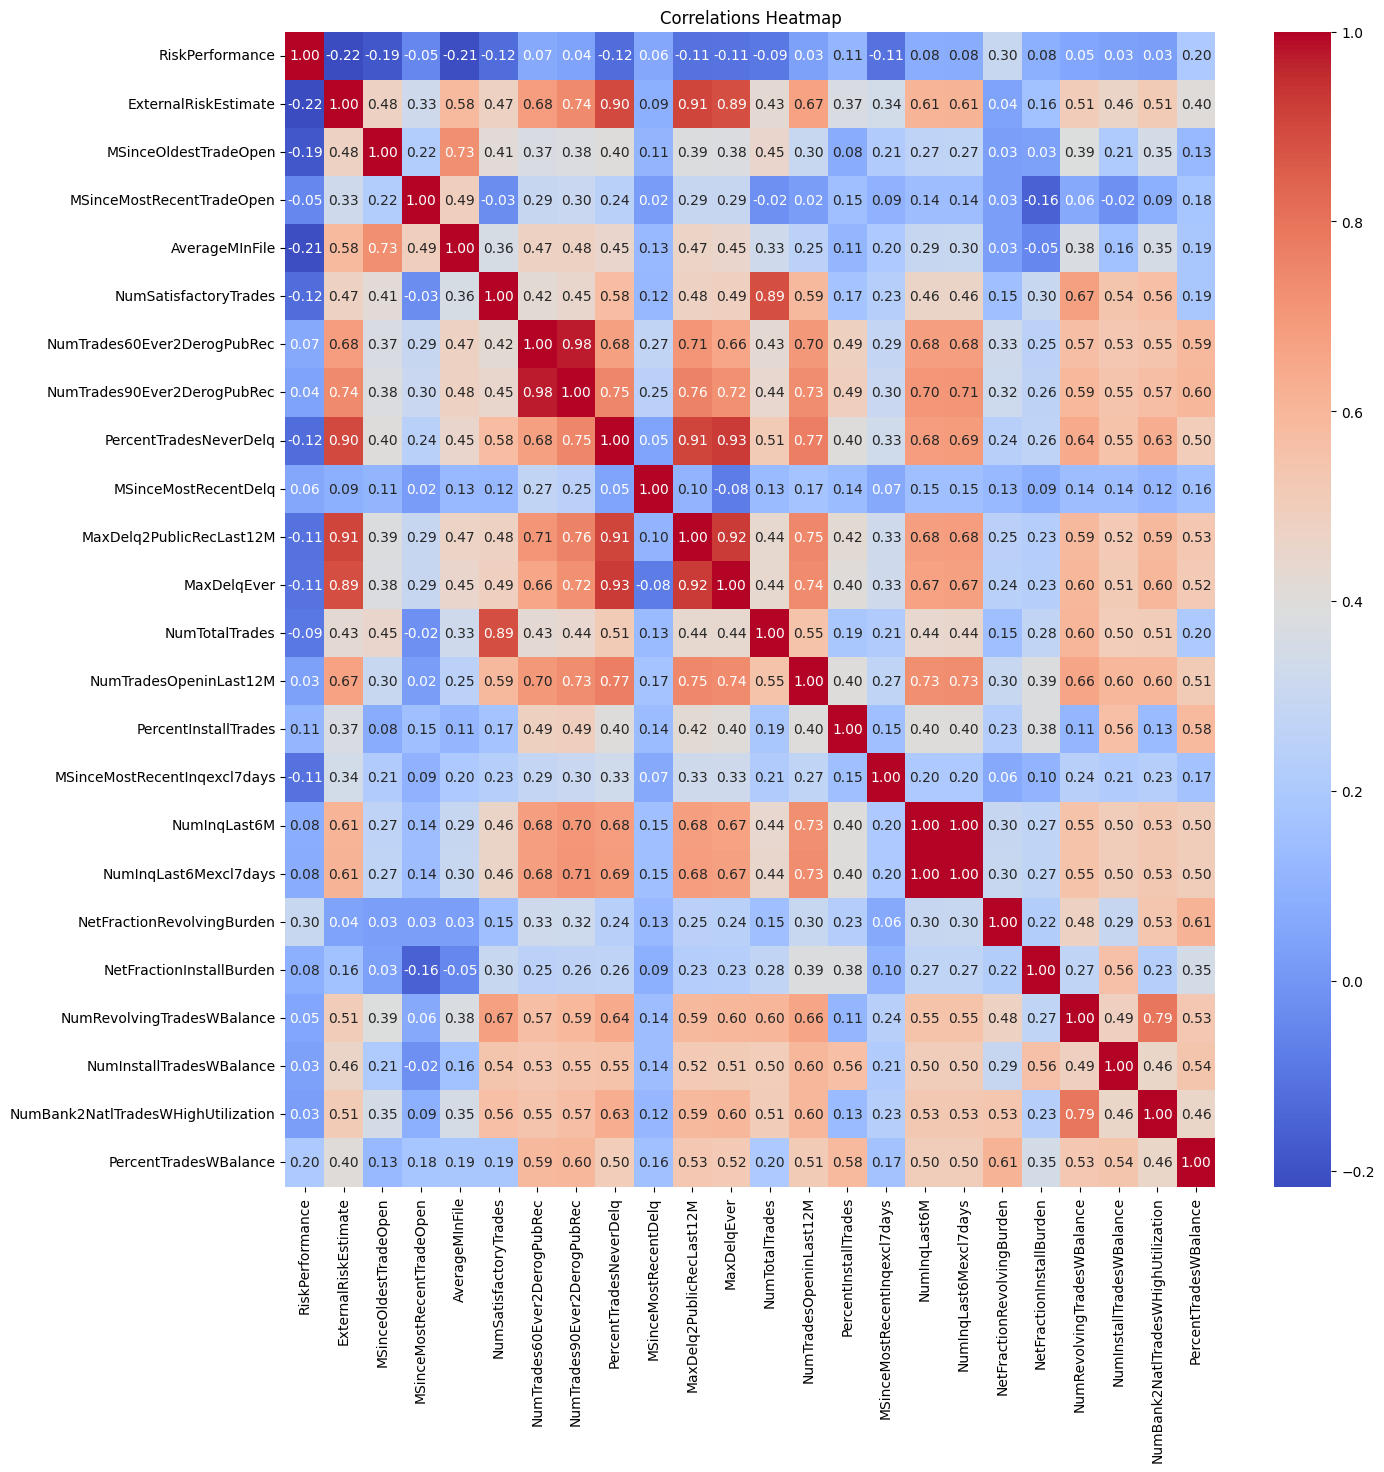

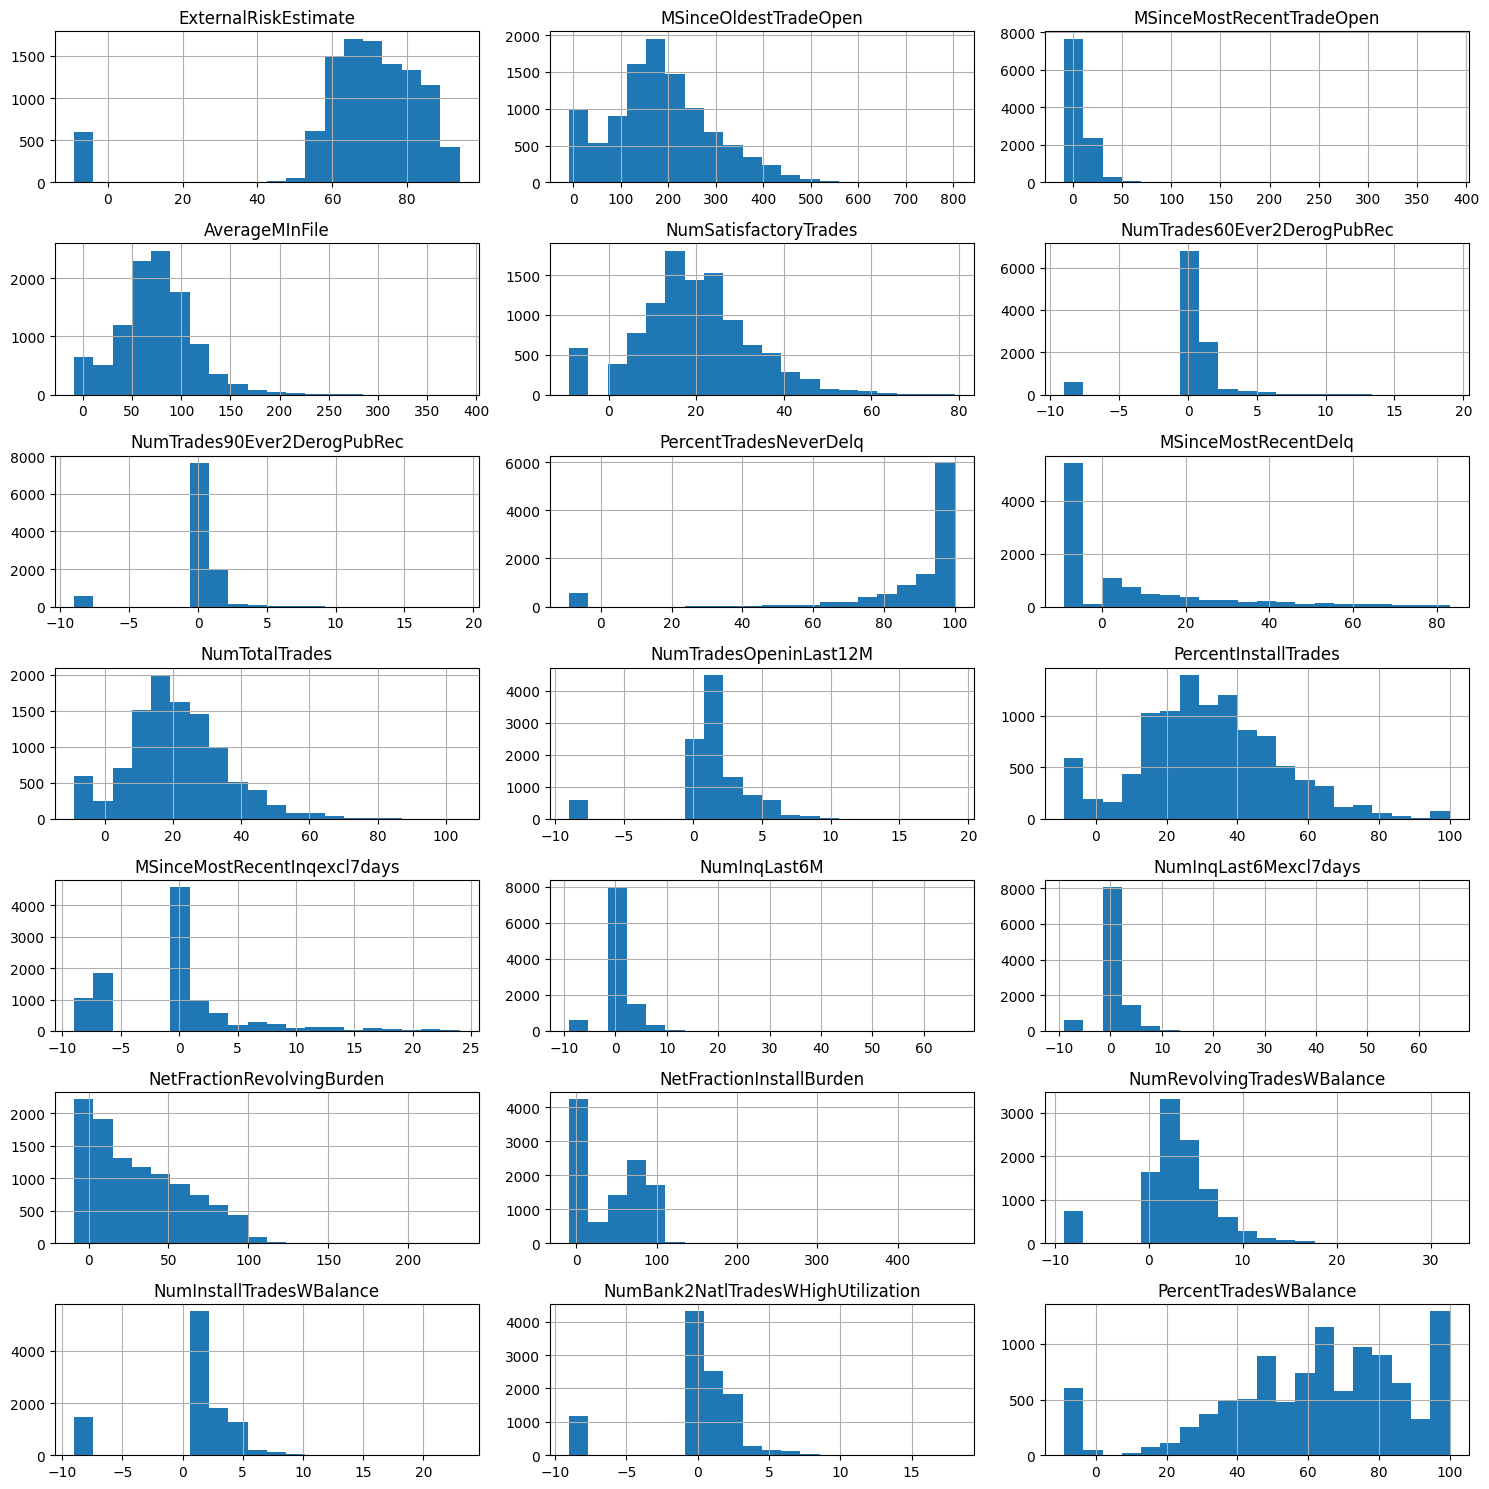

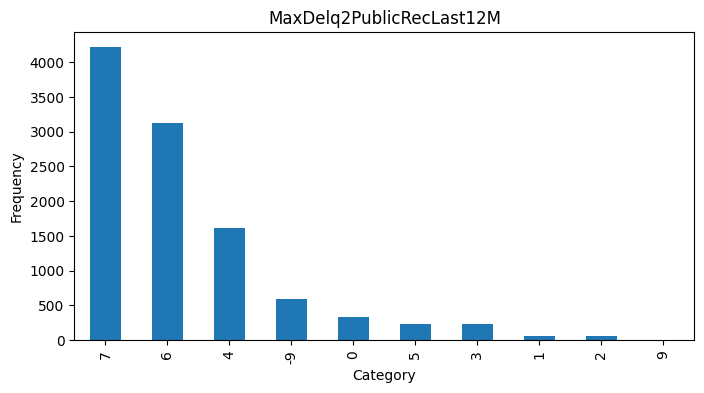

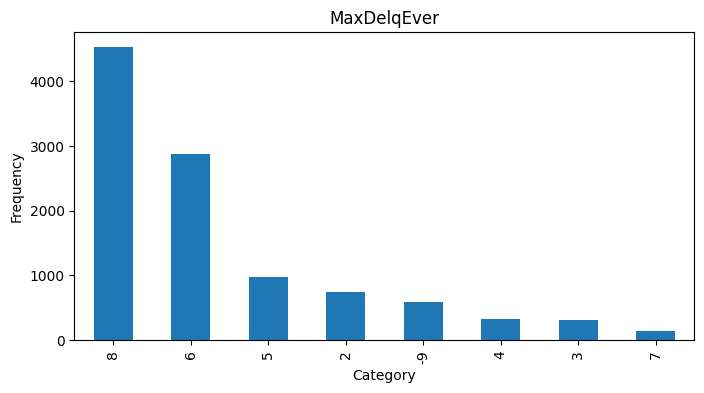

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Display the first few rows
print(f"First few rows:\n{data.head()}\n")

# Check class balance
print(f"Class distribution:\n{data['RiskPerformance'].value_counts(normalize=True)}\n")

# Display summary statistics
print(f"Summary statistics:\n{data.describe()}\n")

# Check for missing values
print(f"Missing values:\n{data.isnull().sum()}\n")

# Plot correlations heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlations Heatmap")
plt.show()

# Plot histograms for continuous features
continuous_features = ['ExternalRiskEstimate', 'MSinceOldestTradeOpen', 'MSinceMostRecentTradeOpen', 'AverageMInFile', 'NumSatisfactoryTrades', 'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec', 'PercentTradesNeverDelq', 'MSinceMostRecentDelq', 'NumTotalTrades', 'NumTradesOpeninLast12M', 'PercentInstallTrades', 'MSinceMostRecentInqexcl7days', 'NumInqLast6M', 'NumInqLast6Mexcl7days', 'NetFractionRevolvingBurden', 'NetFractionInstallBurden', 'NumRevolvingTradesWBalance', 'NumInstallTradesWBalance', 'NumBank2NatlTradesWHighUtilization', 'PercentTradesWBalance']
data[continuous_features].hist(figsize=(15, 15), bins=20, layout=(7, 3))
plt.tight_layout()
plt.show()

# Plot bar charts for categorical features
categorical_features = ['MaxDelq2PublicRecLast12M', 'MaxDelqEver']
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    data[feature].value_counts().plot(kind='bar')
    plt.title(feature)
    plt.xlabel("Category")
    plt.ylabel("Frequency")
    plt.show()


In [27]:
# Separate features and target
X = data.drop("RiskPerformance", axis=1)
y = data["RiskPerformance"]

# Define column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['ExternalRiskEstimate', 'MSinceOldestTradeOpen', 'MSinceMostRecentTradeOpen', 'AverageMInFile', 'NumSatisfactoryTrades', 'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec', 'PercentTradesNeverDelq', 'MSinceMostRecentDelq', 'NumTotalTrades', 'NumTradesOpeninLast12M', 'PercentInstallTrades', 'MSinceMostRecentInqexcl7days', 'NumInqLast6M', 'NumInqLast6Mexcl7days', 'NetFractionRevolvingBurden', 'NetFractionInstallBurden', 'NumRevolvingTradesWBalance', 'NumInstallTradesWBalance', 'NumBank2NatlTradesWHighUtilization', 'PercentTradesWBalance']),
        ('cat', OneHotEncoder(), ['MaxDelq2PublicRecLast12M', 'MaxDelqEver'])
    ])

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "Neural Network": MLPClassifier()
}

# Fit, transform and evaluate each model
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    print(f"{name}: {score:.4f}")

/Users/davidbellenberg/opt/anaconda3/envs/new_py_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: 0.6993
Decision Tree: 0.6090
Random Forest: 0.7084
Gradient Boosting: 0.7017
SVM: 0.6998
Neural Network: 0.6826


/Users/davidbellenberg/opt/anaconda3/envs/new_py_env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [6]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy.stats import randint as sp_randint


In [12]:
# Define SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)

# Define hyperparameter search space for Gradient Boosting Classifier
param_dist = {
    "classifier__n_estimators": sp_randint(100, 300),
    "classifier__learning_rate": np.logspace(-3, 0, 10),
    "classifier__max_depth": sp_randint(3, 10),
    "classifier__min_samples_split": sp_randint(2, 11),
    "classifier__min_samples_leaf": sp_randint(1, 11),
    "classifier__subsample": [0.8, 0.9, 1.0],
    "classifier__max_features": ['sqrt', 'log2', None],
}

# Select Gradient Boosting Classifier and apply SMOTE
model = GradientBoostingClassifier(random_state=42)
pipeline = ImbPipeline(steps=[('preprocessor', preprocessor),
                              ('oversampler', smote),
                              ('classifier', model)])

# Perform Randomized Search Cross-Validation for hyperparameter tuning
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=50, cv=3, scoring='f1', random_state=42, verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Best parameters: {random_search.best_params_}\n")
print(f"Classification report:\n{classification_report(y_test, y_pred)}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/Users/davidbellenberg/opt/anaconda3/envs/new_py_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/davidbellenberg/opt/anaconda3/envs/new_py_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/davidbellenberg/opt/anaconda3/envs/new_py_env/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/davidbellenberg/opt/anaconda3/envs/new_py_env/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/davidbellenberg/opt/anaconda3/envs/new_py_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py", line 1146, in f1_s

Best parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 6, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 8, 'classifier__min_samples_split': 6, 'classifier__n_estimators': 202, 'classifier__subsample': 0.9}

Classification report:
              precision    recall  f1-score   support

         Bad       0.70      0.74      0.72      1088
        Good       0.70      0.65      0.68      1004

    accuracy                           0.70      2092
   macro avg       0.70      0.70      0.70      2092
weighted avg       0.70      0.70      0.70      2092



In [14]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Assuming X_train and y_train are your training dataset features and target
selector = SelectKBest(mutual_info_classif, k=10) # Choose the top 10 features
selector.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[selector.get_support()]

print("Selected features:", selected_features)

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Retrain your models, e.g., Logistic Regression
logistic_regression_selected = LogisticRegression()
logistic_regression_selected.fit(X_train_selected, y_train)

# Evaluate the model's performance
accuracy_selected = logistic_regression_selected.score(X_test_selected, y_test)
print("Logistic Regression with selected features:", accuracy_selected)


Selected features: Index(['ExternalRiskEstimate', 'MSinceOldestTradeOpen', 'AverageMInFile',
       'NumTrades60Ever2DerogPubRec', 'PercentTradesNeverDelq', 'MaxDelqEver',
       'NumTotalTrades', 'NumInqLast6M', 'NetFractionRevolvingBurden',
       'PercentTradesWBalance'],
      dtype='object')
Logistic Regression with selected features: 0.6739961759082218


/Users/davidbellenberg/opt/anaconda3/envs/new_py_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Create a pipeline to scale the data and apply the logistic regression model
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='liblinear'))
])

# Set up the hyperparameter search space
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

# Perform the grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Show the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Evaluate the model's performance
accuracy_tuned = grid_search.score(X_test, y_test)
print("Logistic Regression with tuned hyperparameters:", accuracy_tuned)



Best hyperparameters: {'classifier__C': 0.1, 'classifier__penalty': 'l1'}
Logistic Regression with tuned hyperparameters: 0.6935946462715105


## random forrest acc 73%


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create a pipeline with the Random Forest model
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Set the hyperparameters to tune
rf_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt']
}

# Create the GridSearchCV object
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the GridSearchCV object to the training data
rf_grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_rf_params = rf_grid_search.best_params_
print("Best hyperparameters:", best_rf_params)

# Get the best score
best_rf_score = rf_grid_search.best_score_
print("Random Forest with tuned hyperparameters:", best_rf_score)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best hyperparameters: {'classifier__max_depth': 20, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Random Forest with tuned hyperparameters: 0.730248282333584


In [18]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter search space
param_dist = {
    'classifier__n_estimators': randint(100, 500),
    'classifier__max_depth': randint(10, 50),
    'classifier__min_samples_split': randint(2, 10),
    'classifier__min_samples_leaf': randint(1, 10),
    'classifier__max_features': ['sqrt', 'log2', None]
}

# Perform the randomized search
random_search = RandomizedSearchCV(
    rf_pipeline, 
    param_distributions=param_dist, 
    n_iter=100, 
    cv=5, 
    scoring='accuracy', 
    verbose=1, 
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters:", random_search.best_params_)
print("Random Forest with tuned hyperparameters:", random_search.best_score_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: 

In [24]:
#print head of ytrain
print(y_train.head())

7364     Bad
611     Good
3333    Good
9483     Bad
511     Good
Name: RiskPerformance, dtype: object


In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)


# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model architecture
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Set up early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on the test set
y_test_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Deep Neural Network test accuracy:", test_accuracy)


Epoch 1/100
105/105 [==============================] - 2s 15ms/step - loss: 0.8291 - accuracy: 0.6271 - val_loss: 0.6013 - val_accuracy: 0.7067
Epoch 2/100
105/105 [==============================] - 1s 13ms/step - loss: 0.6978 - accuracy: 0.6629 - val_loss: 0.5824 - val_accuracy: 0.6995
Epoch 3/100
105/105 [==============================] - 1s 12ms/step - loss: 0.6465 - accuracy: 0.6837 - val_loss: 0.5556 - val_accuracy: 0.7103
Epoch 4/100
105/105 [==============================] - 1s 12ms/step - loss: 0.6032 - accuracy: 0.7033 - val_loss: 0.5559 - val_accuracy: 0.7198
Epoch 5/100
105/105 [==============================] - 1s 13ms/step - loss: 0.5801 - accuracy: 0.7100 - val_loss: 0.5604 - val_accuracy: 0.7216
Epoch 6/100
105/105 [==============================] - 1s 12ms/step - loss: 0.5832 - accuracy: 0.7119 - val_loss: 0.5635 - val_accuracy: 0.7216
Epoch 7/100
105/105 [==============================] - 1s 13ms/step - loss: 0.5671 - accuracy: 0.7211 - val_loss: 0.5555 - val_accuracy:

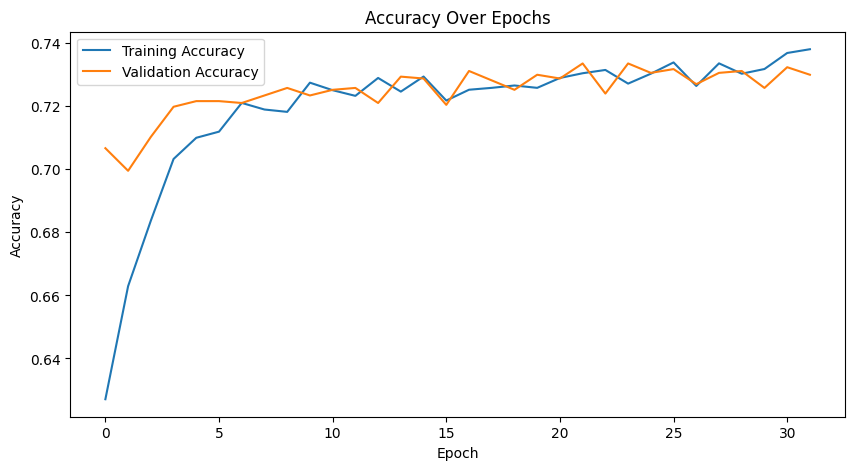

In [29]:
import matplotlib.pyplot as plt
# Plot the accuracy over the epochs
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.show()


In [30]:
#whole histoty as csv
hist_df = pd.DataFrame(history.history)
# round dataframe to 3 decimal places
hist_df = hist_df.round(3)
# save to csv
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)
    

It is possible that the dataset has inherent limitations that prevent the model from achieving a higher accuracy than 70%. Some factors that might contribute to this limitation include:

Noise in the data: If the dataset contains a significant amount of noise, it can be challenging for the model to differentiate between the true underlying patterns and random fluctuations. This can lead to a lower accuracy.
Insufficient features: The available features might not provide enough information to accurately predict the target variable. In this case, additional feature engineering or collecting more relevant features could help improve the model's performance.
Complex relationships: The relationship between the features and the target variable might be highly non-linear or involve complex interactions, making it difficult for the model to capture the underlying patterns. You could try more advanced models or ensemble techniques to better capture these relationships.